In [6]:
import pymongo
import pandas as pd
import numpy as np
import networkx as nx 
import pydot
from IPython.display import Image,display


In [7]:

myclient = pymongo.MongoClient('mongodb://localhost:27017')
mydb = myclient["mydatabase"]
words = mydb.p_and_p


In [8]:
def get_network(word,depth, conncetion_count=1,graph=None):
    if graph == None:
        graph = nx.Graph()
        
    if depth > 0 :
        df = pd.DataFrame(words.find({'word':word}))
        conncetion_count = len(df)
        print(depth, conncetion_count)
        
        if len(df) == 0 :
            print('no connection found for ' ,word)
            pass
        else :
            for connection in df['connection']:
                #print(connection)
                conncetion_count -= 1
                graph.add_edge(word,connection)
                get_network(connection, depth -1,conncetion_count ,graph)
                
                
    else:
        
        if conncetion_count == 0:
             nx.draw(graph, with_labels = True)  
                

In [9]:
word = 'one'

In [10]:
df  = pd.DataFrame(words.find({'word':word}))

<AxesSubplot:>

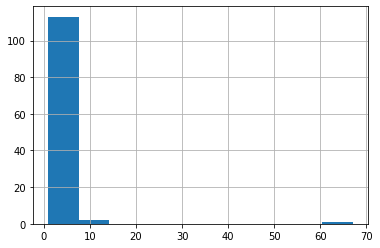

In [11]:
df['frequency'].hist()

In [ ]:
g = get_network(word,2,1,graph=None)

2 116
1 170
1 50
1 783
1 44
1 53
1 84
1 26
1 43
1 36
1 1
1 383
1 12
1 5
1 4
1 98
1 1
1 88
1 219
1 251
1 89
1 27
1 5
1 14
1 49
1 9
1 1
1 43
1 4
1 1
1 40
1 72
1 80
1 42
1 11
1 35
1 8
1 36
1 410
1 65
1 8
1 1
1 255
1 144
1 168
1 27
1 585
1 7
1 64
1 109
1 1
1 276
1 22
1 2
1 134
1 35
1 25
1 1
1 25
1 56
1 18
1 19
1 3
1 38
1 2
1 28
1 7
1 21
1 710
1 16
1 2
1 68
1 175
1 1014
1 4
1 4
1 39
1 40
1 1
1 21
1 18
1 98
1 22
1 1
1 20
1 6
1 125
1 181
1 160
1 2
1 132


In [21]:
graph = pydot.Dot(graph_type="graph", rankdir="UD")
        
    
df = pd.DataFrame(words.find({'word':word}))
conncetion_count = len(df)

if len(df) == 0 :
    print('no connection found for ' ,word)
    pass
else :
    for connection in df['connection']:
        #print(connection)
        conncetion_count -= 1
        edge = pydot.Edge(word,connection)
        graph.add_edge(edge)
        
                
Image(graph.create_png())
graph.write_png('1.png')

True

In [4]:

df = pd.DataFrame(words.find({}))

def get_connection_count(word):
    word_df = df.loc[df['word']==word]
    connection_count = len(word_df)
    if connection_count > 0 :
        connections = word_df['connection']
    else :
        connections = []
        
    return connection_count, connections





                                
                                       

In [16]:
#def get_branch_activations(word,depth) :

word = 'Monday'
depth = 3
level_count = [0]*depth

def count_children(word, index=0, level_count=level_count):
    while index < depth :   
        count ,connections = get_connection_count(word)
        level_count[index] += count
        if count > 0:
            for connection in connections:
                level_count = count_children(connection,index+1,level_count)              
        index +=1
            
    print(level_count)        
    return level_count

    

In [17]:
count_children(word)

[7, 383, 3]
[7, 383, 3]
[7, 383, 3]
[7, 383, 3]
[7, 383, 14]
[7, 383, 14]
[7, 383, 14]
[7, 383, 14]
[7, 383, 14]
[7, 383, 14]
[7, 383, 14]
[7, 383, 14]
[7, 383, 14]
[7, 383, 14]
[7, 383, 14]
[7, 383, 14]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[7, 383, 1272]
[

[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1931]
[7, 383, 1

[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2803]
[7, 383, 2

[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3638]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3666]
[7, 383, 3682]
[7, 383, 3682]
[7, 383, 3682]
[7, 383, 3

[7, 383, 4733]
[7, 383, 4733]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4753]
[7, 383, 4765]
[7, 383, 4765]
[7, 383, 4765]
[7, 383, 4765]
[7, 383, 4765]
[7, 383, 4765]
[7, 383, 4765]
[7, 383, 4765]
[7, 383, 4765]
[7, 383, 4765]
[7, 383, 4765]
[7, 383, 4765]
[7, 383, 4765]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4881]
[7, 383, 4

[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5398]
[7, 383, 5

[7, 383, 6018]
[7, 383, 6018]
[7, 383, 6018]
[7, 383, 6018]
[7, 383, 6018]
[7, 383, 6018]
[7, 383, 6018]
[7, 383, 6018]
[7, 383, 6018]
[7, 383, 6018]
[7, 383, 6018]
[7, 383, 6018]
[7, 383, 6018]
[7, 383, 6018]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6033]
[7, 383, 6034]
[7, 383, 6034]
[7, 383, 6044]
[7, 383, 6044]
[7, 383, 6044]
[7, 383, 6044]
[7, 383, 6044]
[7, 383, 6044]
[7, 383, 6044]
[7, 383, 6044]
[7, 383, 6044]
[7, 383, 6044]
[7, 383, 6044]
[7, 383, 6049]
[7, 383, 6049]
[7, 383, 6049]
[7, 383, 6049]
[7, 383, 6049]
[7, 383, 6049]
[7, 383, 6058]
[7, 383, 6058]
[7, 383, 6058]
[7, 383, 6058]
[7, 383, 6058]
[7, 383, 6058]
[7, 383, 6058]
[7, 383, 6058]
[7, 383, 6058]
[7, 383, 6058]
[7, 383, 6239]
[7, 383, 6239]
[7, 383, 6239]
[7, 383, 6239]
[7, 383, 6239]
[7, 383, 6239]
[7, 383, 6239]
[7, 383, 6

[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7774]
[7, 383, 7

[7, 383, 8352]
[7, 383, 8352]
[7, 383, 8352]
[7, 383, 8352]
[7, 383, 8352]
[7, 383, 8352]
[7, 383, 8355]
[7, 383, 8355]
[7, 383, 8355]
[7, 383, 8355]
[7, 383, 8361]
[7, 383, 8361]
[7, 383, 8361]
[7, 383, 8361]
[7, 383, 8361]
[7, 383, 8361]
[7, 383, 8361]
[7, 383, 8363]
[7, 383, 8363]
[7, 383, 8363]
[7, 383, 8373]
[7, 383, 8373]
[7, 383, 8373]
[7, 383, 8373]
[7, 383, 8373]
[7, 383, 8373]
[7, 383, 8373]
[7, 383, 8373]
[7, 383, 8373]
[7, 383, 8373]
[7, 383, 8373]
[7, 383, 8374]
[7, 383, 8374]
[7, 383, 8387]
[7, 383, 8387]
[7, 383, 8387]
[7, 383, 8387]
[7, 383, 8387]
[7, 383, 8387]
[7, 383, 8387]
[7, 383, 8387]
[7, 383, 8387]
[7, 383, 8387]
[7, 383, 8387]
[7, 383, 8387]
[7, 383, 8387]
[7, 383, 8387]
[7, 383, 8393]
[7, 383, 8393]
[7, 383, 8393]
[7, 383, 8393]
[7, 383, 8393]
[7, 383, 8393]
[7, 383, 8393]
[7, 383, 8415]
[7, 383, 8415]
[7, 383, 8415]
[7, 383, 8415]
[7, 383, 8415]
[7, 383, 8415]
[7, 383, 8415]
[7, 383, 8415]
[7, 383, 8415]
[7, 383, 8415]
[7, 383, 8415]
[7, 383, 8415]
[7, 383, 8

[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9187]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9597]
[7, 383, 9

[7, 383, 9937]
[7, 383, 9937]
[7, 383, 9942]
[7, 383, 9942]
[7, 383, 9942]
[7, 383, 9942]
[7, 383, 9942]
[7, 383, 9942]
[7, 383, 9943]
[7, 383, 9943]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9962]
[7, 383, 9972]
[7, 383, 9972]
[7, 383, 9972]
[7, 383, 9972]
[7, 383, 9972]
[7, 383, 9972]
[7, 383, 9972]
[7, 383, 9972]
[7, 383, 9972]
[7, 383, 9972]
[7, 383, 9972]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9991]
[7, 383, 9992]
[7, 383, 9992]
[7, 383, 9995]
[7, 383, 9995]
[7, 383, 9995]
[7, 383, 9

[7, 383, 10520]
[7, 383, 10520]
[7, 383, 10520]
[7, 383, 10520]
[7, 383, 10527]
[7, 383, 10527]
[7, 383, 10527]
[7, 383, 10527]
[7, 383, 10527]
[7, 383, 10527]
[7, 383, 10527]
[7, 383, 10527]
[7, 383, 10537]
[7, 383, 10537]
[7, 383, 10537]
[7, 383, 10537]
[7, 383, 10537]
[7, 383, 10537]
[7, 383, 10537]
[7, 383, 10537]
[7, 383, 10537]
[7, 383, 10537]
[7, 383, 10537]
[7, 383, 10538]
[7, 383, 10538]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383, 10823]
[7, 383,

[7, 383, 11060]
[7, 383, 11060]
[7, 383, 11060]
[7, 383, 11060]
[7, 383, 11060]
[7, 383, 11060]
[7, 383, 11060]
[7, 383, 11062]
[7, 383, 11062]
[7, 383, 11062]
[7, 383, 11063]
[7, 383, 11063]
[7, 383, 11064]
[7, 383, 11064]
[7, 383, 11065]
[7, 383, 11065]
[7, 383, 11073]
[7, 383, 11073]
[7, 383, 11073]
[7, 383, 11073]
[7, 383, 11073]
[7, 383, 11073]
[7, 383, 11073]
[7, 383, 11073]
[7, 383, 11073]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11105]
[7, 383, 11107]
[7, 383, 11107]
[7, 383, 11107]
[7, 383, 11109]
[7, 383,

[7, 383, 11964]
[7, 383, 11964]
[7, 383, 11964]
[7, 383, 11964]
[7, 383, 11964]
[7, 383, 11964]
[7, 383, 11964]
[7, 383, 11964]
[7, 383, 11964]
[7, 383, 11964]
[7, 383, 11964]
[7, 383, 11964]
[7, 383, 11964]
[7, 383, 11965]
[7, 383, 11965]
[7, 383, 11969]
[7, 383, 11969]
[7, 383, 11969]
[7, 383, 11969]
[7, 383, 11969]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 11985]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383, 12028]
[7, 383,

[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383, 12576]
[7, 383,

[7, 383, 13393]
[7, 383, 13393]
[7, 383, 13393]
[7, 383, 13401]
[7, 383, 13401]
[7, 383, 13401]
[7, 383, 13401]
[7, 383, 13401]
[7, 383, 13401]
[7, 383, 13401]
[7, 383, 13401]
[7, 383, 13401]
[7, 383, 13402]
[7, 383, 13402]
[7, 383, 13403]
[7, 383, 13403]
[7, 383, 13404]
[7, 383, 13404]
[7, 383, 13412]
[7, 383, 13412]
[7, 383, 13412]
[7, 383, 13412]
[7, 383, 13412]
[7, 383, 13412]
[7, 383, 13412]
[7, 383, 13412]
[7, 383, 13412]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13426]
[7, 383, 13428]
[7, 383, 13428]
[7, 383, 13428]
[7, 383, 13430]
[7, 383, 13430]
[7, 383, 13430]
[7, 383, 13433]
[7, 383, 13433]
[7, 383, 13433]
[7, 383, 13433]
[7, 383, 13438]
[7, 383, 13438]
[7, 383, 13438]
[7, 383, 13438]
[7, 383, 13438]
[7, 383, 13438]
[7, 383, 13439]
[7, 383, 13439]
[7, 383, 13466]
[7, 383, 13466]
[7, 383,

[7, 383, 14124]
[7, 383, 14124]
[7, 383, 14124]
[7, 383, 14124]
[7, 383, 14124]
[7, 383, 14124]
[7, 383, 14124]
[7, 383, 14124]
[7, 383, 14124]
[7, 383, 14124]
[7, 383, 14124]
[7, 383, 14125]
[7, 383, 14125]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14150]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383, 14353]
[7, 383,

[7, 383, 15462]
[7, 383, 15462]
[7, 383, 15462]
[7, 383, 15462]
[7, 383, 15462]
[7, 383, 15462]
[7, 383, 15462]
[7, 383, 15462]
[7, 383, 15462]
[7, 383, 15462]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15478]
[7, 383, 15479]
[7, 383, 15479]
[7, 383, 15480]
[7, 383, 15480]
[7, 383, 15481]
[7, 383, 15481]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15500]
[7, 383, 15501]
[7, 383, 15501]
[7, 383, 15517]
[7, 383, 15517]
[7, 383, 15517]
[7, 383, 15517]
[7, 383, 15517]
[7, 383, 15517]
[7, 383, 15517]
[7, 383,

[7, 383, 16278]
[7, 383, 16278]
[7, 383, 16278]
[7, 383, 16278]
[7, 383, 16280]
[7, 383, 16280]
[7, 383, 16280]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383, 16345]
[7, 383,

[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388, 17476]
[7, 388,

[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18462]
[7, 389, 18463]
[7, 389, 18463]
[7, 403, 18873]
[7, 403, 18873]
[7, 403, 18873]
[7, 403, 18873]
[7, 403, 18873]
[7, 403, 18873]
[7, 403, 18873]
[7, 403, 18873]
[7, 403, 18873]
[7, 403, 18873]
[7, 403, 18873]
[7, 403, 18873]
[7, 403, 18873]
[7, 403,

[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403, 20212]
[7, 403,

[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403, 21305]
[7, 403,

[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403, 22078]
[7, 403,

[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441, 22756]
[7, 441,

[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 23966]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441, 24676]
[7, 441,

[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441, 25650]
[7, 441,

[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26464]
[7, 441, 26701]
[7, 441, 26701]
[7, 441, 26701]
[7, 441, 26701]
[7, 441, 26701]
[7, 441, 26701]
[7, 441,

[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27579]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441, 27647]
[7, 441,

[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441, 29108]
[7, 441,

[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29716]
[7, 441, 29742]
[7, 441, 29742]
[7, 441, 29742]
[7, 441, 29742]
[7, 441, 29742]
[7, 441, 29742]
[7, 441, 29742]
[7, 441, 29742]
[7, 441, 29742]
[7, 441, 29742]
[7, 441, 29742]
[7, 441, 29742]
[7, 441, 29742]
[7, 441, 29742]
[7, 441, 29742]
[7, 441,

[7, 448, 30226]

In [96]:
len(words.distinct('word'))

7264

In [97]:
len(words.distinct('connection'))

7265

In [99]:
list(words.getLastInsertedDocument.find())

[]

In [ ]:
df = pd.DataFrame(words.find({}))